# 4. Exploratory Data Analysis

**탐색적 데이터 분석을 통해 데이터를 통달해봅시다.** with [Titanic Data](https://www.kaggle.com/c/titanic)

0. 라이브러리 준비
1. 분석의 목적과 변수 확인
2. 데이터 전체적으로 살펴보기
3. 데이터의 개별 속성 파악하기

## 0. 라이브러리 준비

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
titanic_df = pd.read_csv('train.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 1. 분석의 목적과 변수 확인

- ![image](image/1.png)
- SibSp : 같이 탑승한 형제,자매,배우자 수
- Parch : 같이 탑승한 부모, 자녀의 수
- Fare : 지불 요금
- Cabin : 승무원인 경우에만 승무원 코드
- Embarked : 승선지

### 데이터프레임 살펴보기

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 각 Column별 데이터 타입

In [5]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## 2. 데이터 전체적으로 살펴보기

In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- PassengerID : 의미 X
- Survived
  - mean < 0.5 : 사망한 사람의 비율이 더 높음
- Pclass : 범주형 데이터 -> 큰 의미 X
- Age : 생존자들의 나이
- SipSp
  - mean >= 0.5 : 대부분의 사람이 형제, 자매, 배우자와 함께 탑승
  - max : 큰 규모의 그룹
- Parch
  - max : 큰 규모의 그룹
- Fare
  - mean, max : 평균값 대비 max값이 매우 큼 -> 이상점(Outlier)

### 상관계수 (correlation)

In [7]:
titanic_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


- Fare - Pclass : 등급이 높을수록(Pclass가 낮을수록) 요금이 상승 -> 강한 음의 상관관계
- Pclass - Survived : 음의 상관관계 -> 등급이 높을수록(Pclass가 낮을수록) 생존 확률의 증가 추측
- 그 외
  - Pclass - Age
  - Sipsp - Age

### 결측치 (NaN) 확인
  - Age, Cabin, Embarked

In [8]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## 3. 데이터의 개별 속성 파악하기

### Survived
- 생존자, 사망자 수

In [9]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### Bar Plot (Seaborn CountPlot)

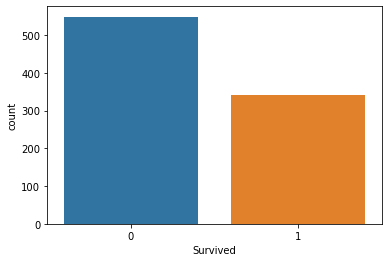

In [11]:
sns.countplot(x='Survived', data=titanic_df)
plt.show()

### Pclass
- 좌석 등급별 탑승자

In [12]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).count()

,Survived
Pclass,
1,216
2,184
3,491


#### 생존자 수

In [13]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


#### 생존자 비율

In [14]:
titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


#### Heat Map

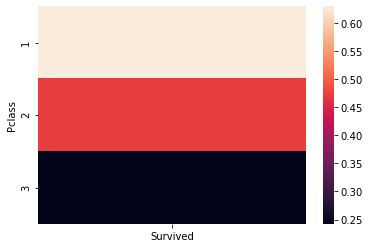

In [16]:
sns.heatmap(titanic_df[['Pclass', 'Survived']].groupby(['Pclass']).mean())
plt.show()

### Sex

In [18]:
titanic_df.groupby(['Survived', 'Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

#### CatPlot

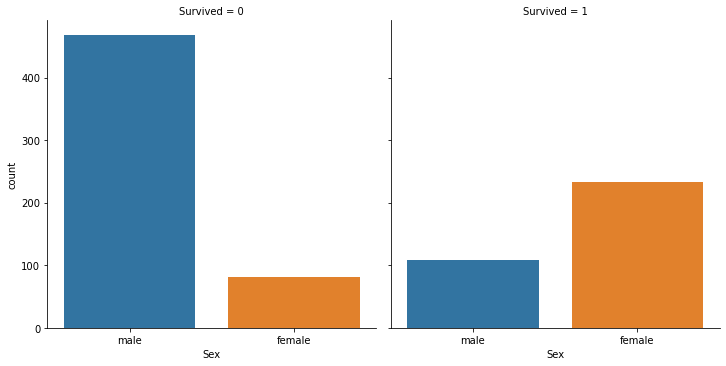

In [22]:
sns.catplot(x = 'Sex', col='Survived', kind='count', data=titanic_df)
plt.show()

### Age
- NaN 존재

In [23]:
titanic_df.describe()['Age']

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### 커널 밀도 함수
  - 생존 여부와 나이의 경향성

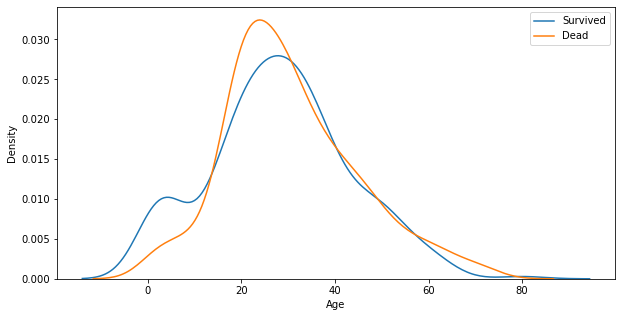

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

sns.kdeplot(x = titanic_df[titanic_df['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(x = titanic_df[titanic_df['Survived'] == 0]['Age'], ax = ax)

plt.legend(['Survived', 'Dead'])

plt.show()

### 복합 요소

#### Sex + Pclass <-> Survived
  - Female + 높은 등급 = 생존비율 높음
  - Male + 낮은 등급 = 생존비율 낮음

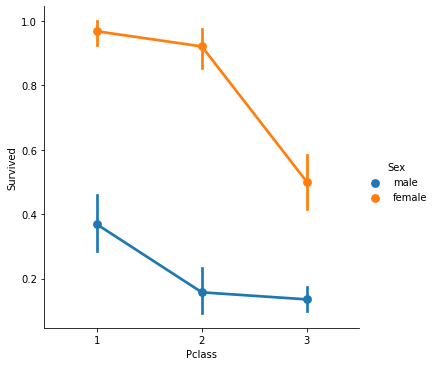

In [27]:
sns.catplot(x='Pclass', y='Survived', hue='Sex',  kind='point', data=titanic_df)
plt.show()

#### Age + Pclass

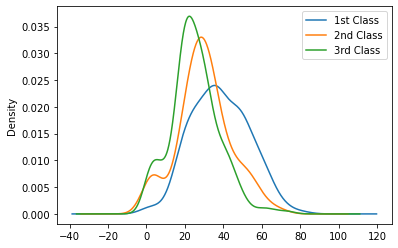

In [31]:
titanic_df['Age'][titanic_df['Pclass'] == 1].plot(kind='kde')
titanic_df['Age'][titanic_df['Pclass'] == 2].plot(kind='kde')
titanic_df['Age'][titanic_df['Pclass'] == 3].plot(kind='kde')

plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()

## Mission : It's Your Turn!

### 1. 본문에서 언급된 Feature를 제외하고 유의미한 Feature를 1개 이상 찾아봅시다.

- Hint : Fare? Sibsp? Parch?

### 2. [Kaggle](https://www.kaggle.com/datasets)에서 Dataset을 찾고, 이 Dataset에서 유의미한 Feature를 3개 이상 찾고 이를 시각화해봅시다.

함께 보면 좋은 라이브러리 document
- [numpy]()
- [pandas]()
- [seaborn]()
- [matplotlib]()